In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import statsmodels.api as sm

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('seaborn')
%matplotlib inline

#statistics
import statsmodels.api as sm
from scipy import fftpack

## READING THE DATA

In [2]:
df_train = pd.read_csv('../challenge_classification/bearing_signals.csv', sep =",")
df_test = pd.read_csv('../challenge_classification/bearing_classes.csv', sep =";")
df_combine = [df_test, df_train]

In [3]:
df_train.shape

(10265700, 13)

In [4]:
df_train.head()

,experiment_id,bearing_1_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w
0,1,0,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.0,0.0,0.000006
1,1,0,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.0,0.0,0.000243
2,1,0,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.0,0.0,0.000369
3,1,0,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.0,0.0,0.000520
4,1,0,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.0,0.0,0.000175


In [5]:
df_train.columns

Index(['experiment_id', 'bearing_1_id', 'bearing_2_id', 'timestamp', 'a1_x',
       'a1_y', 'a1_z', 'a2_x', 'a2_y', 'a2_z', 'rpm', 'hz', 'w'],
      dtype='object')

## EDA & Feature Engineering
### We will calculate the domain features
Maximum value
Minimum value
Mean value
Standard deviation (unbiased)
Root mean square value (RMS)
Skewness
Kurtosis
Crest Factor (Max/RMS)
Form Factor (RMS/mean)

In [6]:
df_bearing_1_x = df_train.drop(['a2_x','a2_y','a2_z','a1_y','a1_z'], axis = 1)
df_bearing_1_y = df_train.drop(['a2_x','a2_y','a2_z','a1_x','a1_z'], axis = 1)
df_bearing_1_z = df_train.drop(['a2_x','a2_y','a2_z','a1_x','a1_y'], axis = 1)
df_bearing_2_x = df_train.drop(['a1_x','a1_y','a1_z','a2_y','a2_z'], axis = 1)
df_bearing_2_y = df_train.drop(['a1_x','a1_y','a1_z','a2_x','a2_z'], axis = 1)
df_bearing_2_z = df_train.drop(['a1_x','a1_y','a1_z','a2_x','a2_y'], axis = 1)
bearing_feature = [df_bearing_1_x,df_bearing_1_y,df_bearing_1_z,df_bearing_2_x,df_bearing_2_y,df_bearing_2_z]
list_column = ['fft_a1_x','fft_a1_y','fft_a1_z','fft_a2_x','fft_a2_y','fft_a2_z']

In [7]:
def by_axis_bearing(bearing_feature,i):
    max_list = []
    for index in range(len(bearing_feature)):
        bearing_idx = bearing_feature[index]
        df_bearing = bearing_idx[bearing_idx['bearing_2_id'] == i]
        fft_values = fftpack.fft(df_bearing)
        max_amplitude = np.argmax(np.abs(fft_values))
        max_list.append(max_amplitude)
    return max_list

In [8]:
number_bearing = df_train['bearing_2_id'].max()

max_list = by_axis_bearing(bearing_feature,1)
new_set = pd.DataFrame([max_list],columns=list_column,index=[1])

for i in range(2,number_bearing+1):
    max_list = by_axis_bearing(bearing_feature,i)
    temp_set = pd.DataFrame([max_list],columns=list_column,index=[i])
    new_set = new_set.append(temp_set)

In [9]:
df_train = df_train.drop(['a1_x', 'a1_y', 'a1_z'],axis=1)

In [10]:
def rename_column(df,prefix):
    column_name = list(df.columns)
    column_name = [prefix + name for name in column_name]
    return df.set_axis(column_name, axis=1)

In [11]:
max_set = df_train.groupby(['bearing_2_id']).max()
max_set = rename_column(max_set,"max_")
min_set = df_train.groupby(['bearing_2_id']).min()
min_set = rename_column(min_set,"min_")
mean_set = df_train.groupby(['bearing_2_id']).mean()
mean_set = rename_column(mean_set,"mean_")
std_set = df_train.groupby(['bearing_2_id']).std()
std_set = rename_column(std_set,"std_")
median_set = df_train.groupby(['bearing_2_id']).median()
median_set = rename_column(median_set,"median_")
sum_set = df_train.groupby(['bearing_2_id']).sum()
range_set = df_train.groupby(['bearing_2_id']).max() - df_train.groupby(['bearing_2_id']).min()
range_set = rename_column(range_set,"range_")
kurtosis_set = df_train.groupby(['bearing_2_id']).apply(pd.DataFrame.kurtosis)
kurtosis_set = rename_column(kurtosis_set, 'kurtosis_')
skew_set = df_train.groupby(['bearing_2_id']).skew()
skew_set = rename_column(skew_set, 'skew_')

In [13]:
df1 = pd.concat([max_set, min_set, mean_set, std_set, median_set, range_set, kurtosis_set, skew_set], axis=1)
df1['target']= df_test.iloc[1:,1]

In [ ]:
df = pd.concat([mean_set,new_set,std_set,min_set,max_set,median_set],axis=1)
df_m['target']= df_test.iloc[1:,1]

## Plots

### A1 Bearing on 3 Axis (X, Y, Z) on Timestamp

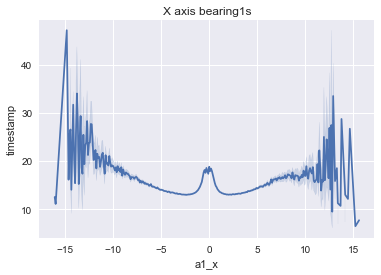

In [3]:
sns.lineplot(data = df_train, x='a1_x', y='timestamp')
plt.title('X axis bearing1s')
plt.show()

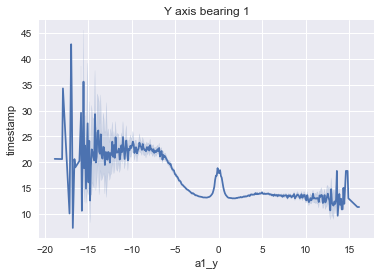

In [5]:
sns.lineplot(data = df_train, x='a1_y', y='timestamp')
plt.title('Y axis bearing 1')
plt.show()

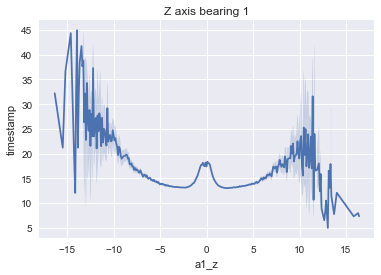

In [6]:
sns.lineplot(data = df_train, x='a1_z', y='timestamp')
plt.title('Z axis bearing 1')
plt.show()

### A2 Bearing on 3 Axis (X, Y, Z) on Timestamp

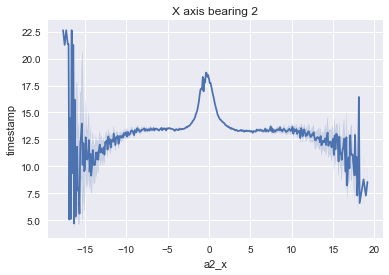

In [7]:
sns.lineplot(data = df_train, x='a2_x', y='timestamp')
plt.title('X axis bearing 2')
plt.show()

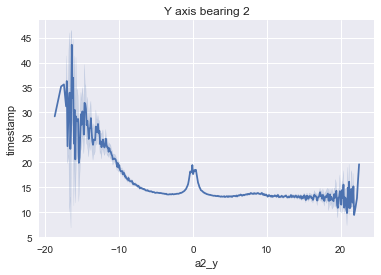

In [8]:
sns.lineplot(data = df_train, x='a2_y', y='timestamp')
plt.title('Y axis bearing 2')
plt.show()

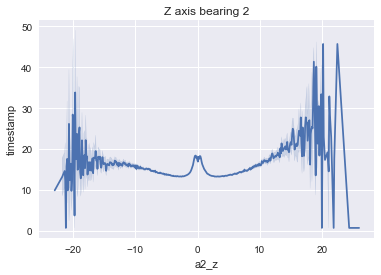

In [9]:
sns.lineplot(data = df_train, x='a2_z', y='timestamp')
plt.title('Z axis bearing 2')
plt.show()

## A2 compared to Expirements

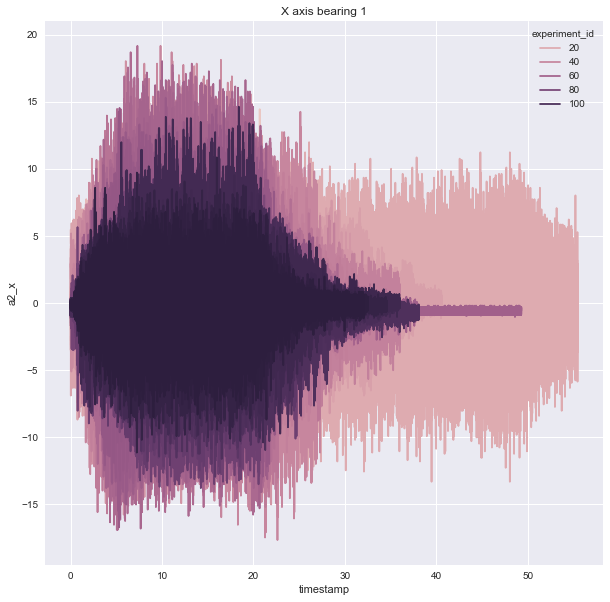

In [10]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df_train, x='timestamp', y='a2_x', hue = 'experiment_id')
plt.title('X axis bearing 1')
plt.show()

## Mean A2 bearing Axis Acceleration on Timestamp

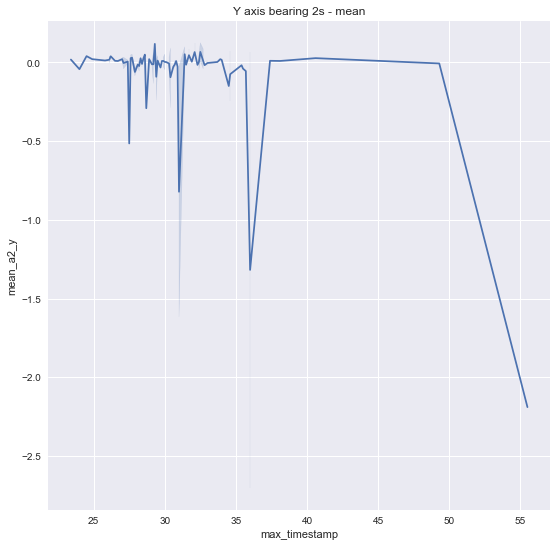

In [35]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='mean_a2_y', x='max_timestamp')
plt.title('Y axis bearing 2s - mean')
plt.show()

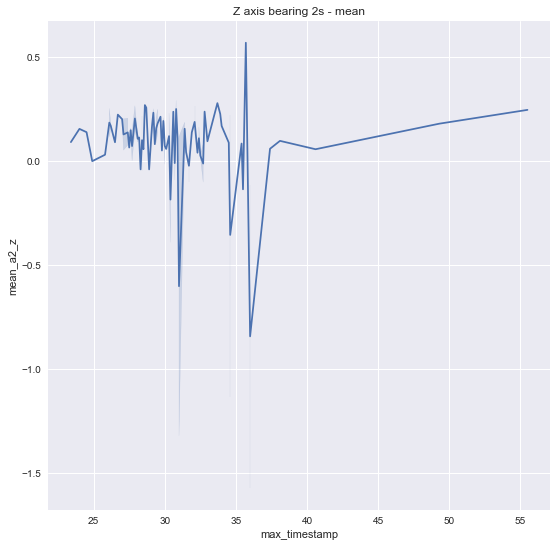

In [37]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='mean_a2_z', x='max_timestamp')
plt.title('Z axis bearing 2s - mean')
plt.show()

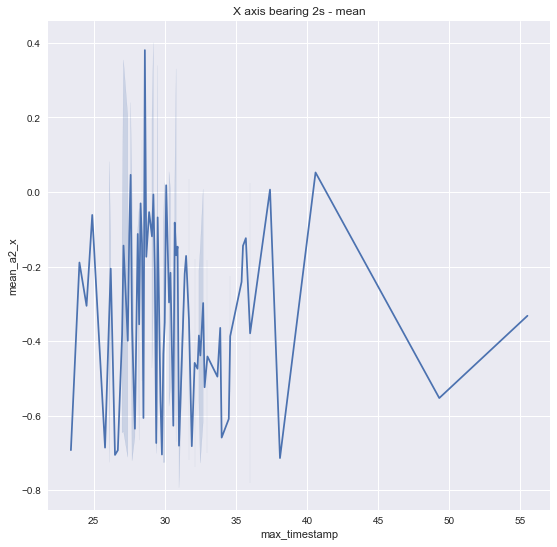

In [38]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='mean_a2_x', x='max_timestamp')
plt.title('X axis bearing 2s - mean')
plt.show()

RANGE OF BEARING 2 ON DIFFERRENT AXIS

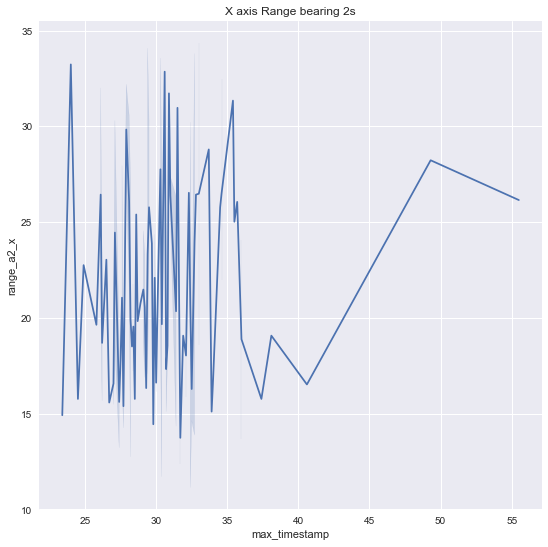

In [45]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='range_a2_x', x='max_timestamp')
plt.title('X axis Range bearing 2s')
plt.show()

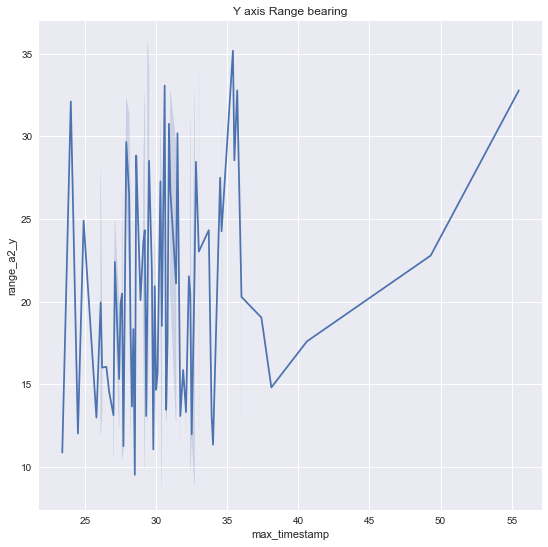

In [48]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='range_a2_y', x='max_timestamp')
plt.title('Y axis Range bearing')
plt.show()

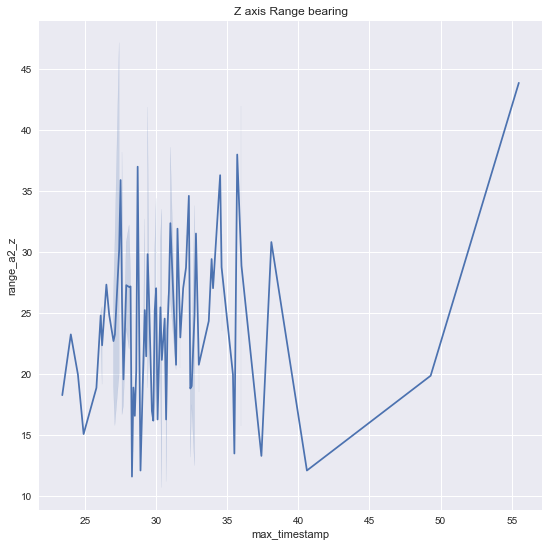

In [49]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='range_a2_z', x='max_timestamp')
plt.title('Z axis Range bearing')
plt.show()

Mean of A2 on different axis with mean RPM

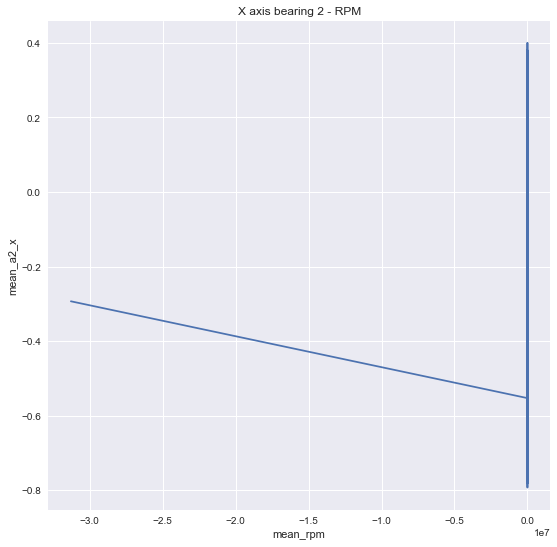

In [52]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='mean_a2_x', x='mean_rpm')
plt.title('X axis bearing 2 - RPM')
plt.show()

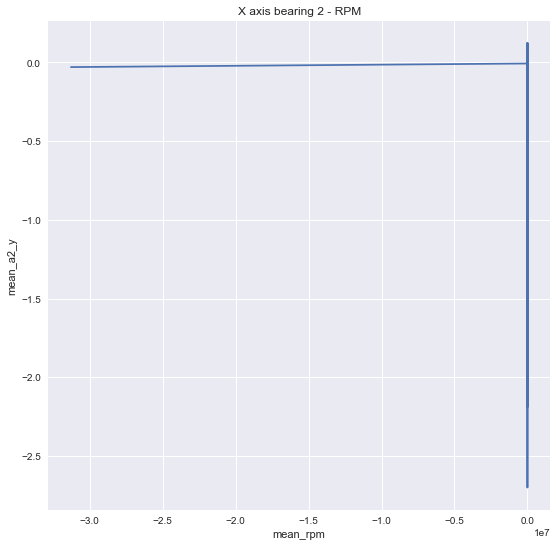

In [54]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='mean_a2_y', x='mean_rpm')
plt.title('X axis bearing 2 - RPM')
plt.show()

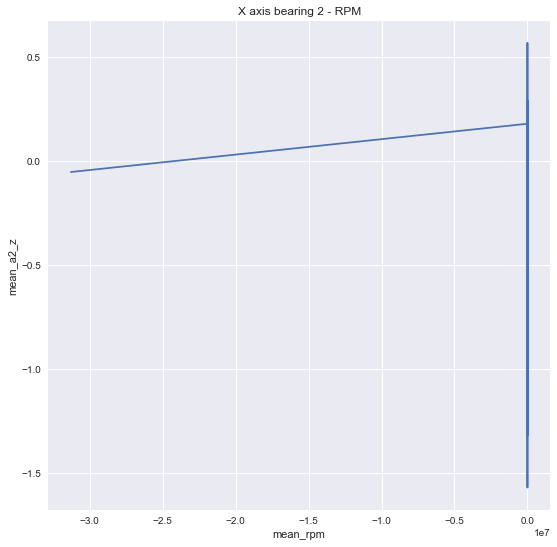

In [55]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='mean_a2_z', x='mean_rpm')
plt.title('X axis bearing 2 - RPM')
plt.show()

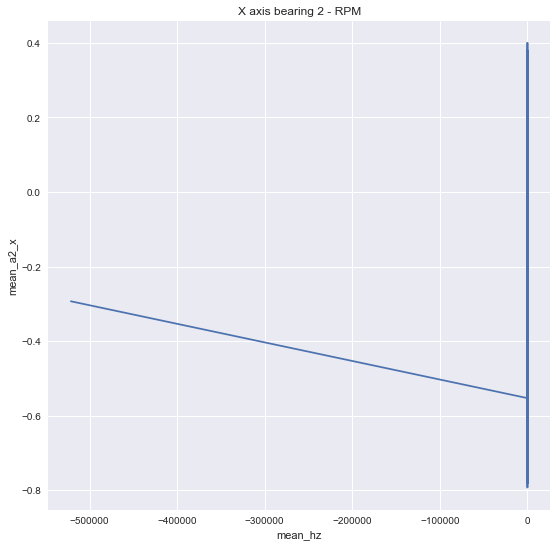

In [59]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='mean_a2_x', x='mean_hz')
plt.title('X axis bearing 2 - RPM')
plt.show()

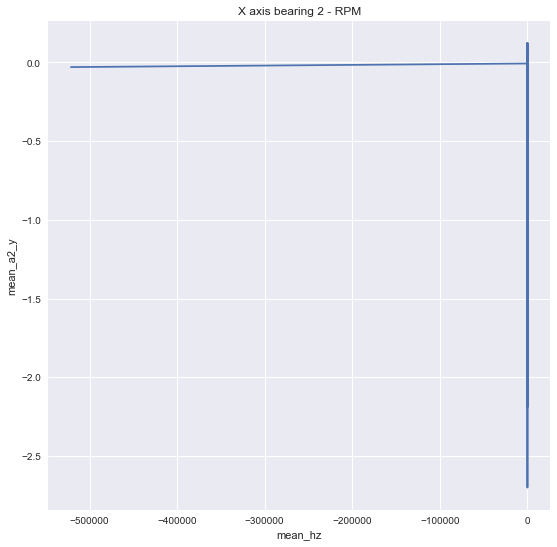

In [58]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='mean_a2_y', x='mean_hz')
plt.title('X axis bearing 2 - RPM')
plt.show()

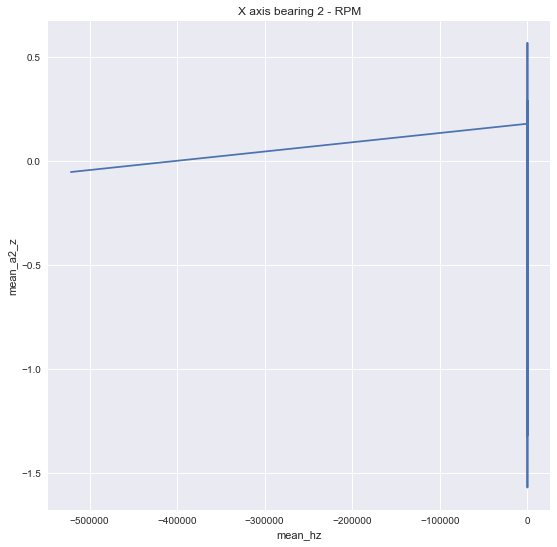

In [57]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='mean_a2_z', x='mean_hz')
plt.title('X axis bearing 2 - RPM')
plt.show()

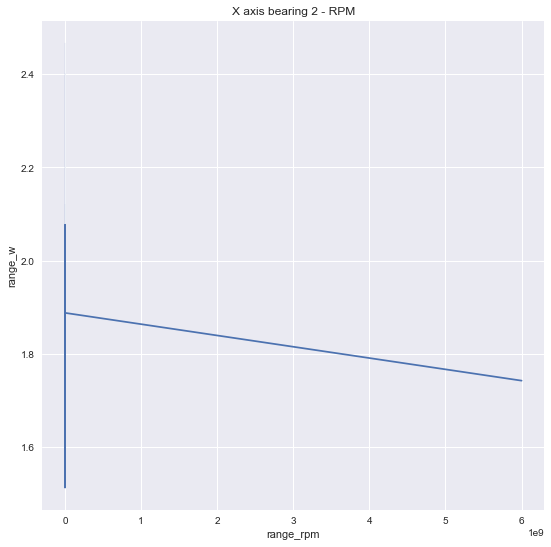

In [61]:
plt.figure(figsize = (9,9))
sns.lineplot(data = df1, y='range_w', x='range_rpm')
plt.title('X axis bearing 2 - RPM')
plt.show()

## Fitting and training a model

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

<AxesSubplot:>

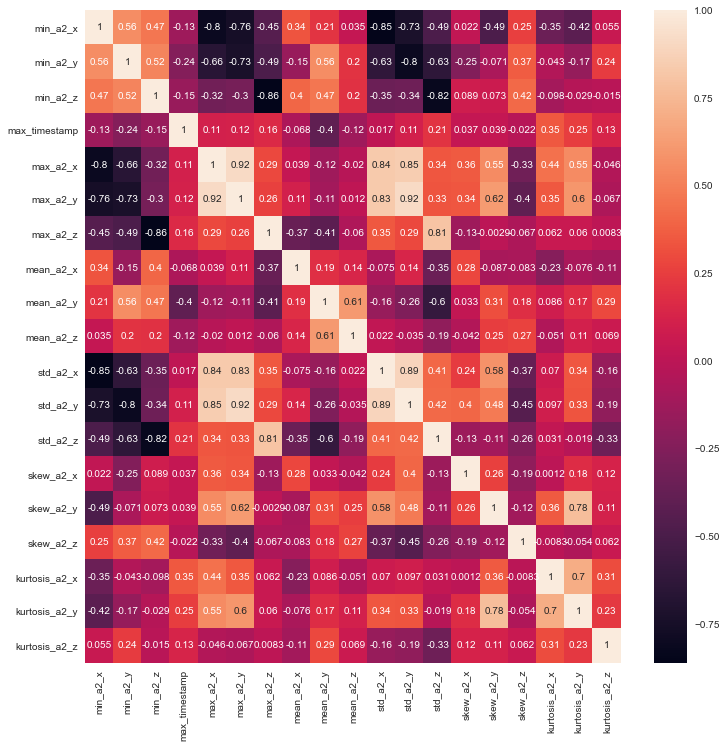

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df_mmm.corr(),annot = True)

In [28]:
df_mmm.shape, df_test.shape

((112, 19), (113, 2))

In [29]:
df_test.drop(index=df_test.index[0], 
        axis=0, 
        inplace=True)
df_test.head()

,bearing_id,status
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0


In [30]:
X = df_mmm
y = df_test['status']

In [34]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
predictions

                                 OLS Regression Results                                
Dep. Variable:                 status   R-squared (uncentered):                   0.443
Model:                            OLS   Adj. R-squared (uncentered):              0.329
Method:                 Least Squares   F-statistic:                              3.894
Date:                Mon, 02 Aug 2021   Prob (F-statistic):                    5.40e-06
Time:                        14:23:46   Log-Likelihood:                         -1.0619
No. Observations:                 112   AIC:                                      40.12
Df Residuals:                      93   BIC:                                      91.78
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

experiment_id
1      0.069269
2      0.151384
3      0.007800
4      0.017441
5      0.057292
         ...   
108    0.511060
109    0.383534
110    0.302579
111    0.471598
112    0.348696
Length: 112, dtype: float64

In [35]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(Model_rf.feature_importances_,3)})

<AxesSubplot:xlabel='feature'>

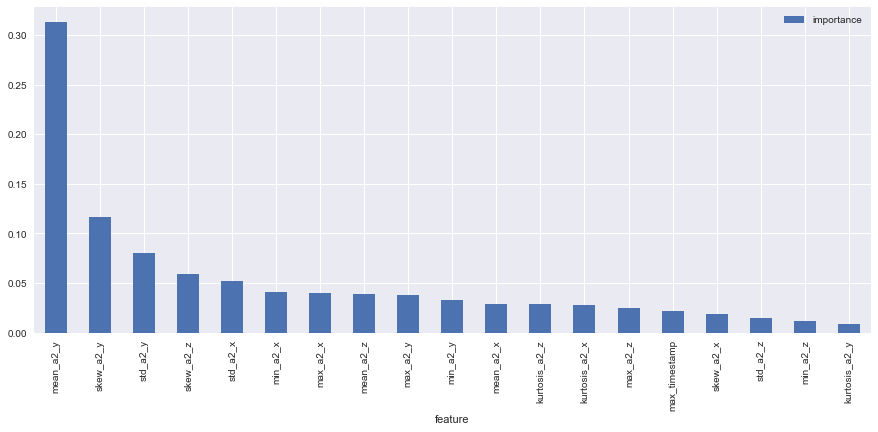

In [36]:
importances1 = importances.sort_values('importance',ascending=False).set_index('feature')
importances1.plot(kind='bar',figsize=(15,6))